<h1 style="font-size:32px; text-align:center;">Projet Scoring</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Ousmane KA</h1>
<hr>

In [30]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# Chargement des données HMEQ
file_path = './Dataset/hmeq_clean_miticulous.csv'
data = pd.read_csv(file_path)

<span style="color:#0A8791; font-size:24px;"><b><u>Analyse des composantes principales</u></b></span>

In [32]:
# Vérifier les valeurs Nan
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [33]:
# Aperçu des données
print("Aperçu des données :")
print(data.head())

# Informations sur les données
data.info()

Aperçu des données :
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB    YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.50    0.0     0.0   
1    1  1300  70053.0   70053.0  HomeImp   Other   7.00    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.00    0.0     0.0   
3    1  1500   6318.0    8796.0  HomeImp   Other   6.15    3.0     0.0   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.00    0.0     0.0   

        CLAGE      NINQ   CLNO    DEBTINC  
0   94.366667  1.000000   9.00  31.603711  
1  121.833333  0.000000  14.00  32.975041  
2  149.466667  1.000000  10.00  31.238346  
3  125.715233  1.186743  15.71  31.016780  
4   93.333333  0.000000  14.00  33.846982  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5914 non-null   int64  
 1   LOAN     5914 non-null   int64  
 2   MORTDU

In [34]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(data.describe(include='all'))


Statistiques descriptives :
                BAD          LOAN        MORTDUE          VALUE   REASON  \
count   5914.000000   5914.000000    5914.000000    5914.000000     5914   
unique          NaN           NaN            NaN            NaN        2   
top             NaN           NaN            NaN            NaN  DebtCon   
freq            NaN           NaN            NaN            NaN     4086   
mean       0.196821  18532.144065   71132.882313  102241.322793      NaN   
std        0.397630  11094.648073   43797.001752   54768.724042      NaN   
min        0.000000   1100.000000    2063.000000    8796.000000      NaN   
25%        0.000000  11000.000000   43744.250000   66286.000000      NaN   
50%        0.000000  16300.000000   62641.500000   89425.500000      NaN   
75%        0.000000  23300.000000   88982.250000  121283.750000      NaN   
max        1.000000  89800.000000  399550.000000  512650.000000      NaN   

          JOB          YOJ        DEROG       DELINQ      

In [35]:
# Encodage des variables catégoriques
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [36]:
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('BAD', axis=1))

In [37]:
# Analyse en composantes principales (ACP)
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

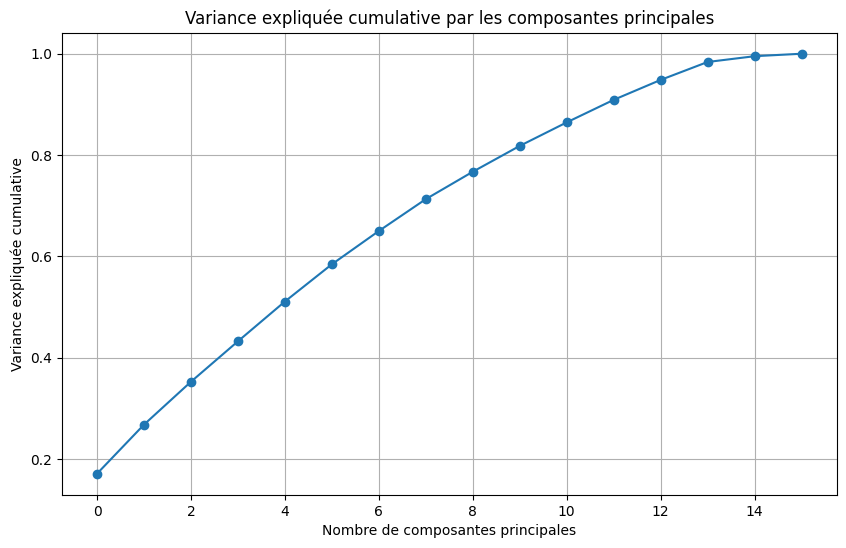

In [38]:
# Visualisation de la variance expliquée
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio, marker='o')
plt.title('Variance expliquée cumulative par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.grid(True)
plt.show()


In [39]:
# Nombre optimal de composantes principales
n_components = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Nombre optimal de composantes principales pour atteindre 80% de variance expliquée : {n_components}")


Nombre optimal de composantes principales pour atteindre 80% de variance expliquée : 10


In [40]:
# Projection avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_components)
data_pca_optimal = pca_optimal.fit_transform(data_scaled)

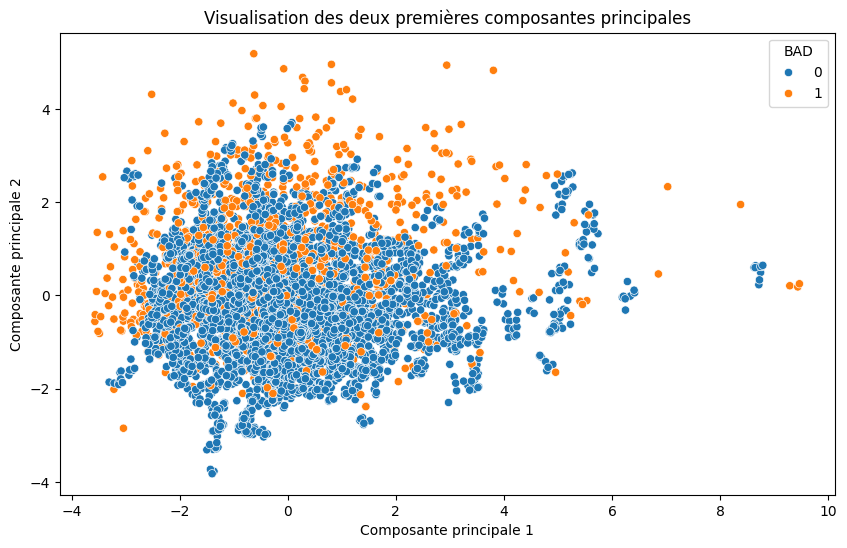

In [41]:
# Visualisation des premières composantes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca_optimal[:, 0], y=data_pca_optimal[:, 1], hue=data['BAD'])
plt.title('Visualisation des deux premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='BAD', loc='best')
plt.show()

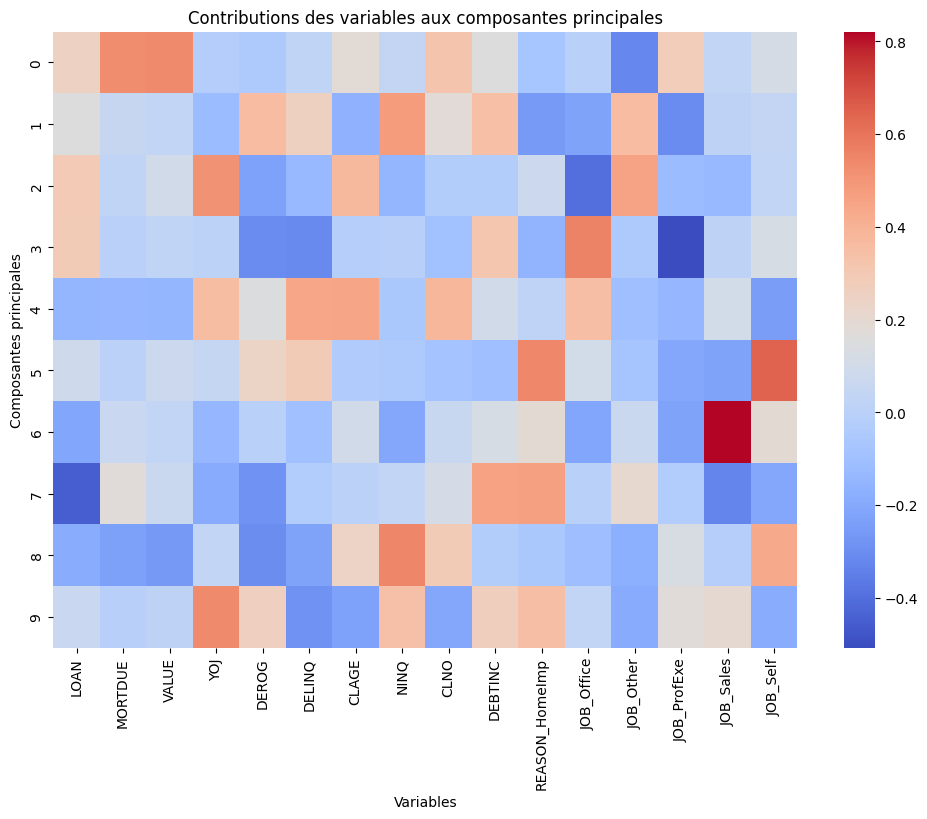

In [42]:
# Contribution des variables aux composantes principales
components = pd.DataFrame(pca_optimal.components_, columns=data.drop('BAD', axis=1).columns)
plt.figure(figsize=(12, 8))
sns.heatmap(components, cmap='coolwarm', annot=False)
plt.title('Contributions des variables aux composantes principales')
plt.xlabel('Variables')
plt.ylabel('Composantes principales')
plt.show()

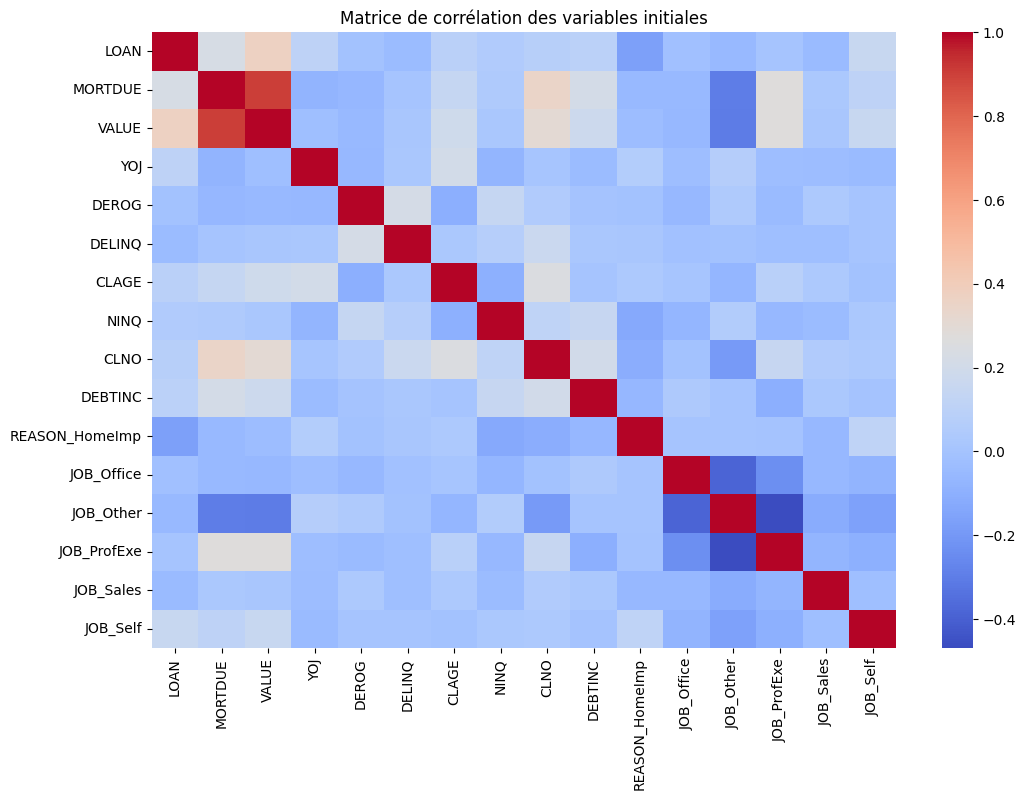

In [43]:
# Analyse des corrélations des variables initiales
correlation_matrix = pd.DataFrame(data_scaled, columns=data.drop('BAD', axis=1).columns).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matrice de corrélation des variables initiales')
plt.show()

In [44]:
# Sauvegarde des données transformées
transformed_data = pd.DataFrame(data_pca_optimal, columns=[f'PC{i+1}' for i in range(n_components)])
transformed_data['BAD'] = data['BAD'].values
transformed_data.to_csv('./Dataset/hmeq_transformed.csv', index=False)
print("Données transformées sauvegardées sous le nom 'hmeq_transformed.csv'.")


Données transformées sauvegardées sous le nom 'hmeq_transformed.csv'.
